# Thermophysical Properties in Solids ::
This file serves to organize and show the solution method of all the equations of state used in the OpenFOAM model. The solid materials used are:

|         thermal conductivities organized              |
| material   | structure          | source filename     |
| -----------|--------------------|---------------------|
| UZrC       | fuel               | k_UZrCfuelHomog.csv |
| dense ZrC  |  assemblyCan       | k_zrC93PerRD.csv    |
| porousZrC  | clad,insulator     | k_ZrC74PerRD.csv    |
| Be         | moderator          | k_Be.csv            |



In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

The file below contains different kinds of functions to be fit

In [40]:
def polynomial4cf(t,c0,c1,c2,c3,c4,c5,c6): # t is temperature and c is the coefficiareents
    f = c0 + c1*t + c2*t**2 + c3*t**3 + c4*t**4 + c5*t**5
    return f
def polynomialLOG10(t,c0,c1): # t is temperature and c is the coefficiareents
    f = c0 * np.log10(c1 * t)
    return f
def polynomial8cf(t,c0,c1,c2,c3,c4,c5,c6,c7): # t is temperature and c is the coefficiareents
    f = c0 + c1*t + c2*t**2 + c3*t**3 + c4*t**4 + c5*t**5 + c6*t**6 + c7*t**7
    return f
def sutherland(t,As,Ts):
    f = (As * np.sqrt(t)) / (1 + Ts/t)
    return f
def printCoefs(c,name): # c is coefs
    print(name+'<8> (')
    print('\t'+"{0:.7E}".format(c[0]),"{0:.7E}".format(c[1]),"{0:.7E}".format(c[2]),"{0:.7E}".format(c[3]))
    print('\t'+"{0:.7E}".format(c[4]),"{0:.7E}".format(c[5]),"{0:.7E}".format(c[6]),"{0:.7E}".format(c[7]))
    print(');')

The process below examines the data generated by the k_UZrCfuelHomog.csv file. It takes the datapoints in the file and creates a line of best fit.

kappaCoeffs<8> (
	1.9924905E+02 -5.6035148E-01 8.6141539E-04 -7.4210798E-07
	3.7158358E-10 -1.0662767E-13 1.6212679E-17 -1.0109105E-21
);
None


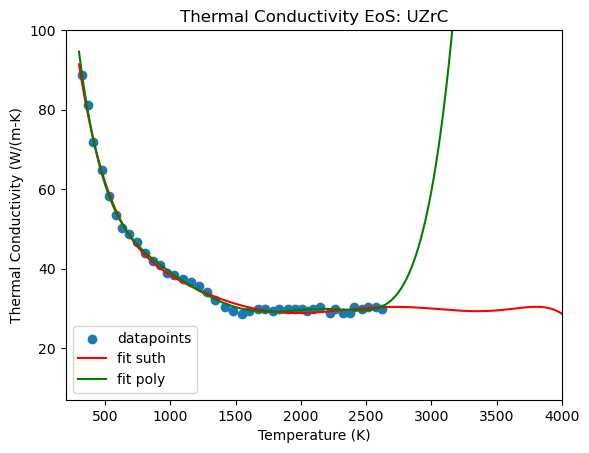

In [42]:
k_UZrC_data = np.genfromtxt('k_UZrCfuelHomog.csv',delimiter=',')
#k_UZrC_data_extended = np.genfromtxt('k_UZrCfuelHomog_extended.csv',delimiter=',')
#k_UZrC_data_extended2 = np.genfromtxt('k_UZrCfuelHomog_extended2.csv',delimiter=',')
k_UZrC_data_new = np.genfromtxt('k_UZrCnewpaper.csv',delimiter=',')
k_UZrC_data_new[:,1] = k_UZrC_data_new[:,1] * 100
new_extrapolate = interp1d(k_UZrC_data_new[:,0],k_UZrC_data_new[:,1],fill_value="extrapolate",kind='nearest-up')

kCoefs_UZrC, pcov = curve_fit(polynomial8cf,k_UZrC_data[:,1],k_UZrC_data[:,0])
kCoefsnew, pcov = curve_fit(polynomial8cf,k_UZrC_data_new[:,0],k_UZrC_data_new[:,1])
t_extended = np.linspace(300,4000,200)

k_to_fit = new_extrapolate(t_extended)
kCoefs_UZrC_extended2, pcov = curve_fit(polynomial8cf,t_extended,k_to_fit)


plt.figure(1)
plt.scatter(k_UZrC_data_new[:,0],k_UZrC_data_new[:,1],label='datapoints')
#plt.scatter(t_extended,new_extrapolate,label='extrap')
plt.plot(t_extended,polynomial8cf(t_extended,*kCoefs_UZrC_extended2),c='r',label='fit suth')
plt.plot(t_extended,polynomial8cf(t_extended,*kCoefsnew),c='g',label='fit poly')
##plt.plot(t_extended,polynomial8cf(t_extended,*kCoefs_UZrC_extended2),c='r',label='fit2 poly')
plt.xlim(200,4000)
plt.ylim(7,100)
plt.title('Thermal Conductivity EoS: UZrC')
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Conductivity (W/(m-K)')
plt.legend()

print(printCoefs(kCoefs_UZrC_extended2,'kappaCoeffs'))